In [1]:

import matplotlib

matplotlib.rcParams["text.usetex"] = True
matplotlib.rcParams["font.size"] = 9
matplotlib.rcParams["savefig.dpi"] = 300
matplotlib.rcParams["legend.fontsize"] = 9


import pycbc
import bilby
import numpy as np
import matplotlib.pylab as plt
import pycbc.psd
from  waveform_model import ModelGenericBeyondGRLensingBBH

In [2]:
waveform_arguments = dict(waveform_approximant='IMRPhenomXHM',
                          reference_frequency=20., minimum_frequency=20.)
sampling_frequency=2048
duration=16
waveform_generator = bilby.gw.WaveformGenerator(
    duration=duration, sampling_frequency=sampling_frequency,
    frequency_domain_source_model=ModelGenericBeyondGRLensingBBH,parameter_conversion = bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters,waveform_arguments=waveform_arguments)
#asd_file_HL='/home/srashti.goyal/.conda/envs/igwn-py37-hanabi/lib/python3.7/site-packages/bilby/gw/detector/noise_curves/aLIGO_O4_high_asd.txt'
asd_file_HL='/home1/srashti.goyal/anaconda3/envs/bilby_env/lib/python3.7/site-packages/bilby/gw/detector/noise_curves/aLIGO_ZERO_DET_high_P_asd.txt'

delta_f = 1/16
fhigh = 1024
flen = int(fhigh/delta_f) +1
flow = 20

psd_HL = pycbc.psd.from_txt(asd_file_HL, flen, delta_f,flow, is_asd_file=True)
#psd_file_V='/home/srashti.goyal/.conda/envs/igwn-py37-hanabi/lib/python3.7/site-packages/bilby/gw/detector/noise_curves/AdV_psd.txt'
psd_file_V='/home1/srashti.goyal/anaconda3/envs/bilby_env/lib/python3.7/site-packages/bilby/gw/detector/noise_curves/AdV_psd.txt'

psd_V = pycbc.psd.from_txt(psd_file_V, flen, delta_f,flow, is_asd_file=False)

gauss_noise_injection = False



10:15 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: waveform_model.ModelGenericBeyondGRLensingBBH
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters


# compare the GR and nonGRlensing polarisations

In [3]:
GW150914_injection_parameters=dict(mass_1 = 38.3, mass_2 = 33.19, luminosity_distance = 2*558.553,dec = -1.223, ra = 2.269, theta_jn = 2.921, chi_1 = 0.3, chi_2 = 0.27, psi = 1.575, phase = 1.893,geocent_time = 1126259462.414,t12= 0,lens_angle= 0)
gr_pols = waveform_generator.time_domain_strain(parameters=GW150914_injection_parameters)

In [4]:
ngr_pars= GW150914_injection_parameters.copy()
ngr_pars['t12'] = 0.03
ngr_pars['lens_angle'] = 1.09#1.08994031
ngr_pols = waveform_generator.time_domain_strain(parameters=ngr_pars)

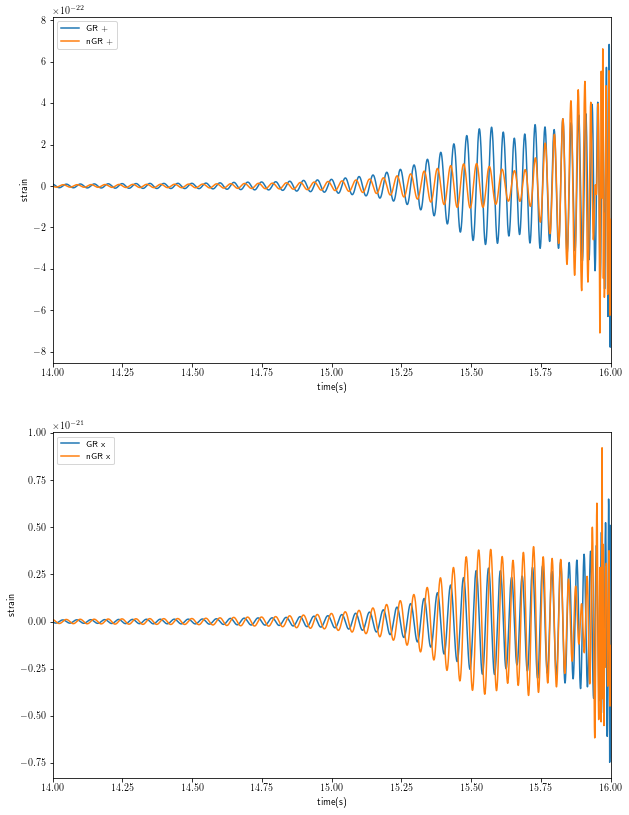

In [5]:
plt.figure(figsize=(10,14))
plt.subplot(211)
plt.plot(waveform_generator.time_array, gr_pols['plus'],label='GR +')
plt.plot(waveform_generator.time_array, ngr_pols['plus'], label = 'nGR +')
plt.xlabel('time(s)')
plt.ylabel('strain')
plt.xlim(14,16)
plt.legend()
plt.subplot(212)
plt.plot(waveform_generator.time_array, gr_pols['cross'],label='GR x')
plt.plot(waveform_generator.time_array, ngr_pols['cross'], label = 'nGR x')
plt.xlabel('time(s)')
plt.ylabel('strain')
plt.xlim(14,16)
plt.legend()
plt.show()

# compare the GR and nonGRlensing strain at each detector

In [6]:
t12_arr = [0.0,0.01,0.01]
lens_angle_arr = [0,np.pi/5,np.pi/3]#1.09]#[np.pi/4,np.pi/4,np.pi/4]#[1.09,1.09,1.09]
injection_parameters=GW150914_injection_parameters.copy()
ifos1 = bilby.gw.detector.InterferometerList(['H1', 'L1','V1'])
ifos2 = bilby.gw.detector.InterferometerList(['H1', 'L1','V1'])
ifos3 = bilby.gw.detector.InterferometerList(['H1', 'L1','V1'])
#set_strain_data_from_zero_noise
#set_strain_data_from_power_spectral_densities
ifos1.set_strain_data_from_zero_noise(sampling_frequency=sampling_frequency, duration=duration,
   start_time=injection_parameters['geocent_time'] - 6)
ifos2.set_strain_data_from_zero_noise(sampling_frequency=sampling_frequency, duration=duration,
   start_time=injection_parameters['geocent_time'] - 6)
ifos3.set_strain_data_from_zero_noise(sampling_frequency=sampling_frequency, duration=duration,
   start_time=injection_parameters['geocent_time'] - 6)

injection_parameters['t12']=t12_arr[0]
injection_parameters['lens_angle'] = lens_angle_arr[0]
injection_1 = ifos1.inject_signal(waveform_generator=waveform_generator,parameters=injection_parameters)
injection_parameters['t12']=t12_arr[1]
injection_parameters['lens_angle'] = lens_angle_arr[1]
injection_2 = ifos2.inject_signal(waveform_generator=waveform_generator,parameters=injection_parameters)
injection_parameters['t12']=t12_arr[2]
injection_parameters['lens_angle'] = lens_angle_arr[2]
injection_3 = ifos3.inject_signal(waveform_generator=waveform_generator,parameters=injection_parameters)

10:15 bilby INFO    : Injected signal in H1:
10:15 bilby INFO    :   optimal SNR = 31.58
10:15 bilby INFO    :   matched filter SNR = 31.58+0.00j
10:15 bilby INFO    :   mass_1 = 38.3
10:15 bilby INFO    :   mass_2 = 33.19
10:15 bilby INFO    :   luminosity_distance = 1117.106
10:15 bilby INFO    :   dec = -1.223
10:15 bilby INFO    :   ra = 2.269
10:15 bilby INFO    :   theta_jn = 2.921
10:15 bilby INFO    :   chi_1 = 0.3
10:15 bilby INFO    :   chi_2 = 0.27
10:15 bilby INFO    :   psi = 1.575
10:15 bilby INFO    :   phase = 1.893
10:15 bilby INFO    :   geocent_time = 1126259462.414
10:15 bilby INFO    :   t12 = 0.0
10:15 bilby INFO    :   lens_angle = 0
10:15 bilby INFO    : Injected signal in L1:
10:15 bilby INFO    :   optimal SNR = 23.66
10:15 bilby INFO    :   matched filter SNR = 23.66+0.00j
10:15 bilby INFO    :   mass_1 = 38.3
10:15 bilby INFO    :   mass_2 = 33.19
10:15 bilby INFO    :   luminosity_distance = 1117.106
10:15 bilby INFO    :   dec = -1.223
10:15 bilby INFO    

In [7]:
fig, ax = plt.subplots(3,1, figsize=(3.375,7),sharex=True) # Phys Rev figsize


for i in [0,1,2]:

    det = ifos1[i]

    ax[i].plot(det.strain_data.time_array,
              det.strain_data.time_domain_strain, color='C2',
              label= ' GR waveform ')#$\Delta t_{12}$ =  '+ str(t12_arr[0])+ ', $\phi_{lens}$ = '+ str(lens_angle_arr[0])[:4])
   
    det = ifos2[i]

    #ax.set_xtick


    ax[i].plot(det.strain_data.time_array,
              det.strain_data.time_domain_strain,color='C0',
                alpha=0.6,
              label= ' $\Delta t_{12}$ =  '+ str(int(t12_arr[1]*1000))+ 'ms , $\phi_\mathrm{lens}$ = '+ str(lens_angle_arr[1])[:4])

   
    det = ifos3[i]

    ax[i].plot(det.strain_data.time_array,
              det.strain_data.time_domain_strain,color='C1',
               alpha=0.6,
              label= ' $\Delta t_{12}$ =  '+ str(int(t12_arr[2]*1000))+ 'ms , $\phi_\mathrm{lens}$ = '+ str(lens_angle_arr[2])[:4])

    gps_time= injection_parameters['geocent_time']

    ax[i].set_xlim(gps_time - 0.8, gps_time + 0.05)
    ax[i].set_ylabel("Strain " + str(det.name) )
#     ax[i].grid()
    ax[i].set_xticks([])


ax[2].set_xlabel("Time")
ax[0].legend(loc='lower left')
plt.tight_layout()
plt.savefig('figs/GW150914-like-waveform.pdf')    

plt.show()



In [8]:
np.array(lens_angle_arr)/np.pi

array([0.        , 0.2       , 0.33333333])

In [9]:
9*np.pi/20

1.413716694115407

In [10]:
import fractions
fractions.Fraction(0.35).limit_denominator()

Fraction(7, 20)

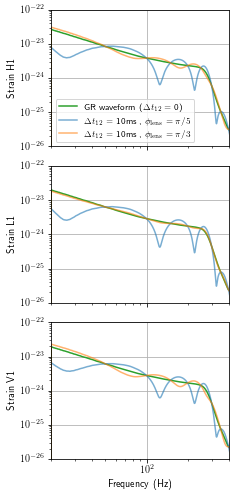

In [11]:
fig, ax = plt.subplots(3,1, figsize=(3.375,7),sharex=True) # Phys Rev figsize


for i in [0,1,2]:

    det = ifos1[i]

    ax[i].loglog(det.strain_data.frequency_array,
              np.abs(det.strain_data.frequency_domain_strain), color='C2',
              label= ' GR waveform ($\Delta t_{12}$ =  0) ')#$\Delta t_{12}$ =  '+ str(t12_arr[0])+ ', $\phi_{lens}$ = '+ str(lens_angle_arr[0])[:4])
   
    det = ifos2[i]

    #ax.set_xtick


    ax[i].loglog(det.strain_data.frequency_array,
              np.abs(det.strain_data.frequency_domain_strain),color='C0',
                 alpha=0.6,
              label= ' $\Delta t_{12}$ =  '+ str(int(t12_arr[1]*1000))+ 'ms , $\phi_\mathrm{lens} = \pi/5$')

   
    det = ifos3[i]

    ax[i].loglog(det.strain_data.frequency_array,
              np.abs(det.strain_data.frequency_domain_strain),color='C1',
                 alpha=0.6,
              label= ' $\Delta t_{12}$ =  '+ str(int(t12_arr[2]*1000))+ 'ms , $\phi_\mathrm{lens} = \pi/3$')

    
    gps_time= injection_parameters['geocent_time']

    ax[i].set_xlim(20, 400)
    ax[i].set_ylim(1e-26, 1e-22)

    ax[i].grid()
    ax[i].set_ylabel("Strain " + str(det.name) )



ax[2].set_xlabel("Frequency (Hz)")
ax[0].legend(loc='lower left')
plt.tight_layout()

plt.savefig('figs/GW150914-like-waveform-fdomain.pdf')    

plt.show()


In [12]:
print('SNR H,L,V: ', ifos1.meta_data['H1']['optimal_SNR'],ifos1.meta_data['L1']['optimal_SNR'],ifos1.meta_data['V1']['optimal_SNR']
     )  

SNR H,L,V:  31.578349151356896 23.657848375888225 17.691730198658043


In [13]:
GW190814_injection_parameters= dict(mass_1 = 24.45, mass_2 = 2.71, luminosity_distance = 295.18,dec = -0.436, ra = 0.217, theta_jn = 0.51, chi_1 = 0.06, chi_2 = 0.46, psi = 1.575, phase = 4.421,geocent_time = 1249852256.99,t12= 0,lens_angle= 0)

ifos = bilby.gw.detector.InterferometerList(['H1', 'L1','V1'])
ifos.set_strain_data_from_zero_noise(sampling_frequency=sampling_frequency,duration=duration,
   start_time=GW190814_injection_parameters['geocent_time'] - 6)
inj=ifos.inject_signal(parameters=GW190814_injection_parameters,waveform_generator=waveform_generator)

10:15 bilby INFO    : Injected signal in H1:
10:15 bilby INFO    :   optimal SNR = 27.39
10:15 bilby INFO    :   matched filter SNR = 27.39+0.00j
10:15 bilby INFO    :   mass_1 = 24.45
10:15 bilby INFO    :   mass_2 = 2.71
10:15 bilby INFO    :   luminosity_distance = 295.18
10:15 bilby INFO    :   dec = -0.436
10:15 bilby INFO    :   ra = 0.217
10:15 bilby INFO    :   theta_jn = 0.51
10:15 bilby INFO    :   chi_1 = 0.06
10:15 bilby INFO    :   chi_2 = 0.46
10:15 bilby INFO    :   psi = 1.575
10:15 bilby INFO    :   phase = 4.421
10:15 bilby INFO    :   geocent_time = 1249852256.99
10:15 bilby INFO    :   t12 = 0
10:15 bilby INFO    :   lens_angle = 0
10:15 bilby INFO    : Injected signal in L1:
10:15 bilby INFO    :   optimal SNR = 32.22
10:15 bilby INFO    :   matched filter SNR = 32.22+0.00j
10:15 bilby INFO    :   mass_1 = 24.45
10:15 bilby INFO    :   mass_2 = 2.71
10:15 bilby INFO    :   luminosity_distance = 295.18
10:15 bilby INFO    :   dec = -0.436
10:15 bilby INFO    :   ra 

In [14]:
print(GW150914_injection_parameters)

{'mass_1': 38.3, 'mass_2': 33.19, 'luminosity_distance': 1117.106, 'dec': -1.223, 'ra': 2.269, 'theta_jn': 2.921, 'chi_1': 0.3, 'chi_2': 0.27, 'psi': 1.575, 'phase': 1.893, 'geocent_time': 1126259462.414, 't12': 0, 'lens_angle': 0}


In [15]:
"$ & $".join(np.array(list(GW150914_injection_parameters.values())).astype('str'))

'38.3$ & $33.19$ & $1117.106$ & $-1.223$ & $2.269$ & $2.921$ & $0.3$ & $0.27$ & $1.575$ & $1.893$ & $1126259462.414$ & $0.0$ & $0.0'

In [16]:
"$ & $".join(np.array(list(GW190814_injection_parameters.values())).astype('str'))

'24.45$ & $2.71$ & $295.18$ & $-0.436$ & $0.217$ & $0.51$ & $0.06$ & $0.46$ & $1.575$ & $4.421$ & $1249852256.99$ & $0.0$ & $0.0'

In [17]:
GW150914_injection_parameters.keys()

dict_keys(['mass_1', 'mass_2', 'luminosity_distance', 'dec', 'ra', 'theta_jn', 'chi_1', 'chi_2', 'psi', 'phase', 'geocent_time', 't12', 'lens_angle'])

In [18]:
print('SNR H,L,V: ', ifos.meta_data['H1']['optimal_SNR'],ifos.meta_data['L1']['optimal_SNR'],ifos.meta_data['V1']['optimal_SNR']
     )  

SNR H,L,V:  27.39441172106224 32.2176933828669 12.403468937252912


# Plot again the saved mismatch calculations

In [56]:
def plot_mismatch_t12_phi_grid(t12_grid,phi_grid,mismatchs_arr,snr_arr=[1/3,1/3,1/3],save=None, cmap="YlOrBr"):
    fig=plt.figure(figsize=(3.375,2.5))
    snr_arr=np.array(snr_arr)
    #plt.scatter(t12_grid.flatten()*1000,phi_grid.flatten(),c=np.log10(mismatchs_arr[:,:,0]),cmap=cmap,rasterized=True)#np.log(np.sqrt((mismatchs_arr**2).sum(axis=2)).flatten()))
    #plt.scatter(t12_grid.flatten()*1000,phi_grid.flatten(),c=np.log10(np.sqrt((mismatchs_arr**2).sum(axis=2)).flatten()))
    avg_mismatch=1-np.average(1-mismatchs_arr,axis=2,weights=snr_arr**2)
    plt.scatter(t12_grid.flatten()*1000,phi_grid.flatten(),c=avg_mismatch.flatten()*100,cmap=cmap,rasterized=True,norm=matplotlib.colors.LogNorm())
    plt.xlabel('$\Delta t_{12}(ms)$')
    plt.ylabel('$\phi_\mathrm{lens}(rad)$')
    #plt.colorbar().set_label('$\log \mathcal{M} $')
   # plt.clim(-3,-0.2)
    plt.clim(1e-1,50)
    #plt.grid()
    plt.xlim(-100,100)
    plt.ylim(0,np.pi/2)
    ax=plt.gca()
    ax.set_yticks(np.arange(0, np.pi/2+0.01, np.pi/8))
    labels = ['$0$', r'$\pi/8$', r'$\pi/4$', r'$3\pi/8$', r'$\pi/2$']
    ax.set_yticklabels(labels)
    if save is not None:
        plt.tight_layout()
        plt.savefig('figs/'+save +'.pdf',dpi=100,bbox_inches='tight',pad_inches=0.05)
   # plt.title('Match nonGR lensed waveform and GR waveform')
    plt.show()

## Mismatch

$1-\frac{ \Sigma \rho_i^2 Match_i}{\Sigma \rho_i^2 }$

$\rho_i$ of the injection at Ith detector.


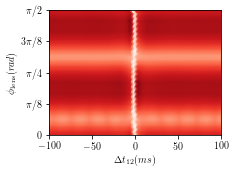

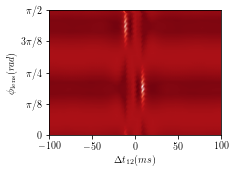

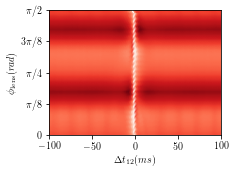

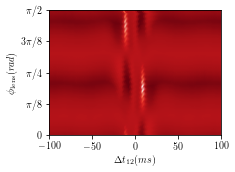

In [61]:
#fnames=['GW150914-like-gr','GW150914-like-nonngr', 'GW190814-like-gr','GW190814-like-nongr']
fnames=['re-GW150914-like-gr','re-GW150914-like-nonngr', 're-GW190814-like-gr-hom','re-GW190814-like-nongr']


for fname in fnames:
    # fname=fnames[2] #
    snr_190814 = [27.4,32.2,12.4]
    snr_150914 = [31.2,23.7,17.4]
    data=np.load('data/'+fname+'.npz')
    t12_grid = data['t12_grid']
    phi_grid = data['phi_grid']
    mismatchs_arr=data['mismatchs_arr']
    ids = np.where(mismatchs_arr<=1e-8)
    mismatchs_arr[ids]=1e-8
    plot_mismatch_t12_phi_grid(t12_grid,phi_grid,mismatchs_arr,snr_arr=snr_190814,save=fname, cmap="Reds")#fname

In [60]:
import matplotlib.pyplot as plt
import matplotlib as mpl

fig = plt.figure(figsize=(5,3))
ax = fig.add_axes([0.05, 0.80, 0.9, 0.1])

#cb = mpl.colorbar.ColorbarBase(ax, orientation='horizontal',label='$\log_{10} \mathcal{M}$',
#                               norm=mpl.colors.Normalize(-3, -0.2), cmap=plt.cm.get_cmap("Reds"))
cb = mpl.colorbar.ColorbarBase(ax, orientation='horizontal',label= '$ \mathcal{M}$ (\%)',
                               norm=mpl.colors.LogNorm(1e-1, 50), cmap=plt.cm.get_cmap("Reds"))


plt.savefig('figs/just_colorbar.pdf', bbox_inches='tight',pad_inches=0.05,dpi=100)

In [34]:
fnames=['re-GW150914-like-gr','re-GW150914-like-nonngr', 're-GW190814-like-gr-hom','re-GW190814-like-nongr']
fname=fnames[1] #
snr_190814 = [27.4,32.2,12.4]
snr_150914 = [31.2,23.7,17.4]
data=dict(np.load('data/'+fname+'.npz'))
t12_grid = data['t12_grid']
phi_grid = data['phi_grid']
mismatchs_arr=data['mismatchs_arr']
#plot_mismatch_t12_phi_grid(t12_grid,phi_grid,mismatchs_arr,snr_arr=snr_190814,save=fname, cmap="Reds")#fname

In [35]:
snr_arr = np.array(snr_150914)
plt.scatter(t12_grid*1000,phi_grid,c=((np.average(mismatchs_arr,axis=2,weights=snr_arr**2))*100),cmap='Reds',rasterized=True,norm=matplotlib.colors.LogNorm())
plt.xlim(-100,100)
plt.ylim(0,np.pi/2)
plt.clim(0.01,100)
#plt.axvline(0)
plt.colorbar()

In [41]:
np.where(mismatchs_arr[:,:,1]< 1e-4)

(array([40]), array([55]))

In [51]:
ids = np.where(mismatchs_arr==0)

(array([40, 40]), array([55, 55]), array([1, 2]))

In [52]:
mismatchs_arr[ids]

array([0., 0.])

In [43]:
np.log(mismatchs_arr[40,55,1])

/home1/srashti.goyal/anaconda3/envs/bilby_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


-inf

In [25]:
fname

're-GW150914-like-gr'

In [26]:
np.pi/5

0.6283185307179586

In [27]:
t12_arr = np.linspace(-0.1,0.1,101)
phi_arr = np.linspace(0,np.pi/2,101)
t12_grid,phi_grid=np.meshgrid(t12_arr,phi_arr)

In [39]:
phi_grid[40,1]

0.6283185307179586

In [40]:
t12_grid[1,55]

0.009999999999999995

In [30]:
t12_grid[1,50]

0.0